In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("../raw_data/covid_19_clean_complete.csv")

print(df.head())


  Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa  


In [5]:
df.columns = [col.lower().replace(' ','_') for col in df.columns]
print(df.shape)          # Number of rows and columns
print(df.columns)        # Column names
print(df.head())         # First 5 rows
print(df.info())         # Data types and non-null counts
print(df.describe())     # Basic stats for numeric columns


(49068, 10)
Index(['province/state', 'country/region', 'lat', 'long', 'date', 'confirmed',
       'deaths', 'recovered', 'active', 'who_region'],
      dtype='object')
  province/state country/region       lat       long        date  confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   deaths  recovered  active             who_region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa  
<class 'pandas.core.frame.DataFra

In [6]:
# 1. Drop duplicate 'date' column
df = df.loc[:,~df.columns.duplicated()]

# 2. Check for negative values in active cases
print("Negative active cases:", (df['active'] < 0).sum())

# If negative active cases exist, decide how to handle:
# Option 1: Set negatives to 0 (simple fix)
df.loc[df['active'] < 0, 'active'] = 0

# 3. Fix column names to be consistent
df.columns = [col.lower().replace(' ', '_') for col in df.columns]

# 4. Confirm cleaned dataset info again
print(df.info())
print(df.head())

Negative active cases: 18
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   province/state  14664 non-null  object 
 1   country/region  49068 non-null  object 
 2   lat             49068 non-null  float64
 3   long            49068 non-null  float64
 4   date            49068 non-null  object 
 5   confirmed       49068 non-null  int64  
 6   deaths          49068 non-null  int64  
 7   recovered       49068 non-null  int64  
 8   active          49068 non-null  int64  
 9   who_region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB
None
  province/state country/region       lat       long        date  confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN     

In [7]:
df.to_csv("../output/cleaned_covid_data.csv", index=False)

In [8]:
# 1. Total confirmed, deaths, recovered over time globally
# Group by 'date' and sum relevant columns
global_daily = df.groupby('date')[['confirmed', 'deaths', 'recovered']].sum().reset_index()
print(global_daily[['confirmed', 'deaths', 'recovered']].max())

confirmed    16480485
deaths         654036
recovered     9468087
dtype: int64


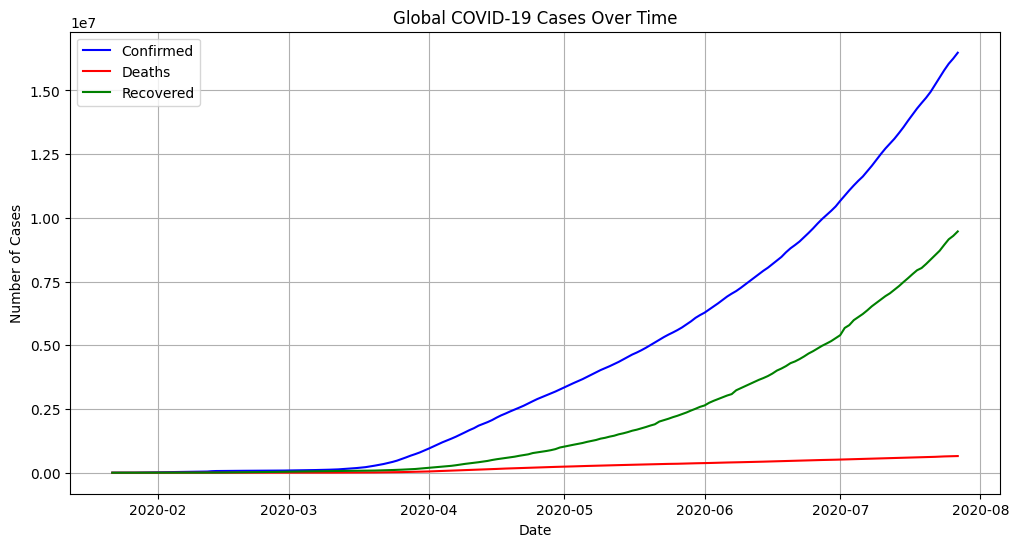

In [9]:
global_daily['date'] = pd.to_datetime(global_daily['date'])

plt.figure(figsize=(12,6))

plt.plot(global_daily['date'], global_daily['confirmed'], label='Confirmed', color='blue')
plt.plot(global_daily['date'], global_daily['deaths'], label='Deaths', color='red')
plt.plot(global_daily['date'], global_daily['recovered'], label='Recovered', color='green')

plt.title('Global COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.show()


**INTERPRETATION**
1. Cases started to escalate sharply around March 2020 — this matches the global recognition of the pandemic spreading.

2. Deaths continued rising steadily till August 2020, but when compared to the total confirmed cases, the death count (about 650k) is much smaller relative to 16 million cases.

3. Recoveries are high (over 9 million), which is a positive sign showing many people recovered from the virus.

In [10]:
#2. Top countries by confirmed cases (latest date)
latest_date = df['date'].max()
print("Latest date in data:", latest_date)

Latest date in data: 2020-07-27


In [11]:
latest_data = df[df['date'] == latest_date]

In [12]:
country_confirmed = latest_data.groupby('country/region')['confirmed'].sum().reset_index()
print(country_confirmed)

         country/region  confirmed
0           Afghanistan      36263
1               Albania       4880
2               Algeria      27973
3               Andorra        907
4                Angola        950
..                  ...        ...
182  West Bank and Gaza      10621
183      Western Sahara         10
184               Yemen       1691
185              Zambia       4552
186            Zimbabwe       2704

[187 rows x 2 columns]


In [13]:
top_countries = country_confirmed.sort_values('confirmed', ascending = False).head(10)
top_countries = top_countries.reset_index(drop = True)
print(top_countries)

   country/region  confirmed
0              US    4290259
1          Brazil    2442375
2           India    1480073
3          Russia     816680
4    South Africa     452529
5          Mexico     395489
6            Peru     389717
7           Chile     347923
8  United Kingdom     301708
9            Iran     293606


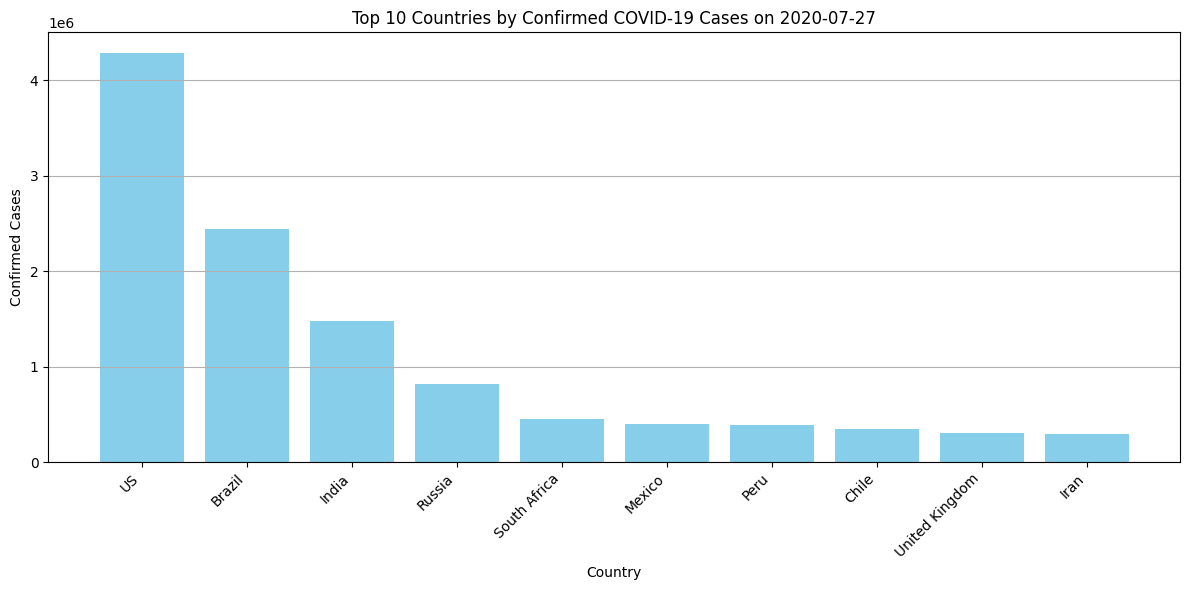

In [14]:
latest_date = pd.to_datetime(latest_date) 
plt.figure(figsize=(12,6))
plt.bar(top_countries['country/region'], top_countries['confirmed'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title(f'Top 10 Countries by Confirmed COVID-19 Cases on {latest_date.date()}')
plt.ylabel('Confirmed Cases')
plt.xlabel('Country')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

**INTERPRETATION**

As of July 27, 2020, the United States had the highest number of confirmed COVID-19 cases, exceeding 4 million. Brazil followed with over 2 million cases — roughly half the number reported in the US. India was close behind with approximately 1.5 million cases.

Together, these three countries accounted for nearly 7.5 to 8 million cases, highlighting the severe concentration of COVID-19 impact. In contrast, most other countries reported fewer than 1 million confirmed cases, underscoring the disproportionate spread of the virus.

In [15]:
country_deaths = latest_data.groupby('country/region')['deaths'].sum().reset_index()
print(country_deaths)

         country/region  deaths
0           Afghanistan    1269
1               Albania     144
2               Algeria    1163
3               Andorra      52
4                Angola      41
..                  ...     ...
182  West Bank and Gaza      78
183      Western Sahara       1
184               Yemen     483
185              Zambia     140
186            Zimbabwe      36

[187 rows x 2 columns]


In [16]:
top_countries = country_deaths.sort_values('deaths', ascending = False).head(10)
top_countries = top_countries.reset_index(drop = True)
print(top_countries)

   country/region  deaths
0              US  148011
1          Brazil   87618
2  United Kingdom   45844
3          Mexico   44022
4           Italy   35112
5           India   33408
6          France   30212
7           Spain   28432
8            Peru   18418
9            Iran   15912


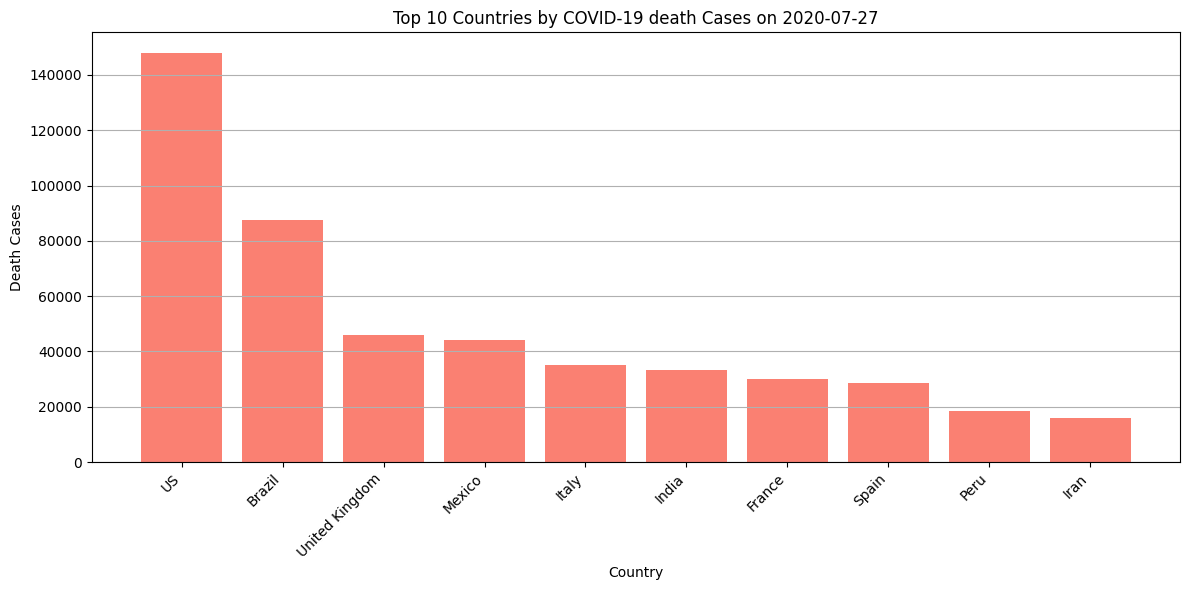

In [17]:
plt.figure(figsize=(12,6))
plt.bar(top_countries['country/region'], top_countries['deaths'], color='salmon')
plt.xticks(rotation=45, ha='right')
plt.title(f'Top 10 Countries by COVID-19 death Cases on {latest_date.date()}')
plt.ylabel('Death Cases')
plt.xlabel('Country')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

**INTERPRETATION**

As of July 27, 2020, the United States suffered the highest number of COVID-19-related deaths, crossing 140,000. Brazil followed with over 80,000 deaths.

Interestingly, while India had the third-highest number of confirmed cases globally, the United Kingdom reported more deaths than India. This contrast highlights differences in healthcare infrastructure, early outbreak severity, or population vulnerability across countries.

In [18]:
region_trends = df.groupby(['date','who_region'])['confirmed'].sum().reset_index()
region_pivot = region_trends.pivot(index='date', columns = 'who_region', values='confirmed')
print(region_trends.head(5))

         date             who_region  confirmed
0  2020-01-22                 Africa          0
1  2020-01-22               Americas          1
2  2020-01-22  Eastern Mediterranean          0
3  2020-01-22                 Europe          0
4  2020-01-22        South-East Asia          2


<Figure size 1400x700 with 0 Axes>

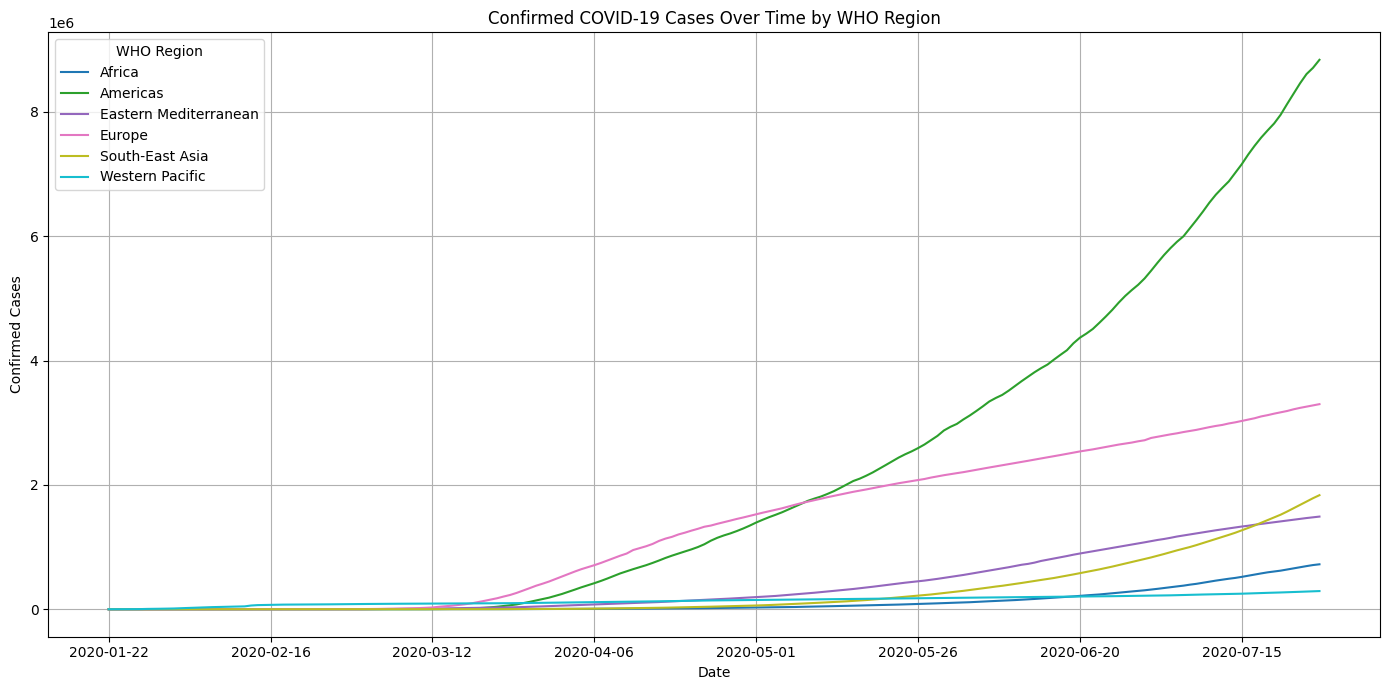

In [19]:
plt.figure(figsize=(14, 7))
region_pivot.plot(figsize=(14, 7), colormap='tab10')

plt.title('Confirmed COVID-19 Cases Over Time by WHO Region')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.grid(True)
plt.legend(title='WHO Region')
plt.tight_layout()
plt.show()

**INTERPRETATION**

In March 2020, Europe experienced a sharp early surge in confirmed COVID-19 cases, leading all regions. However, by May 2020, the United States (part of the Americas region) had overtaken Europe in total confirmed cases.

Other WHO regions maintained comparatively lower case counts throughout the same period, with none surpassing the 2 million mark during this phase of the pandemic. This shows how the initial wave varied significantly by region, with Europe peaking early and the Americas overtaking shortly after.

In [20]:
# Daily New Cases vs Cumulative Cases
# Grouping by date for global totals
daily_df = df.groupby('date')[['confirmed']].sum().reset_index()

# Calculating daily new cases
daily_df['daily_new'] = daily_df['confirmed'].diff().fillna(0)

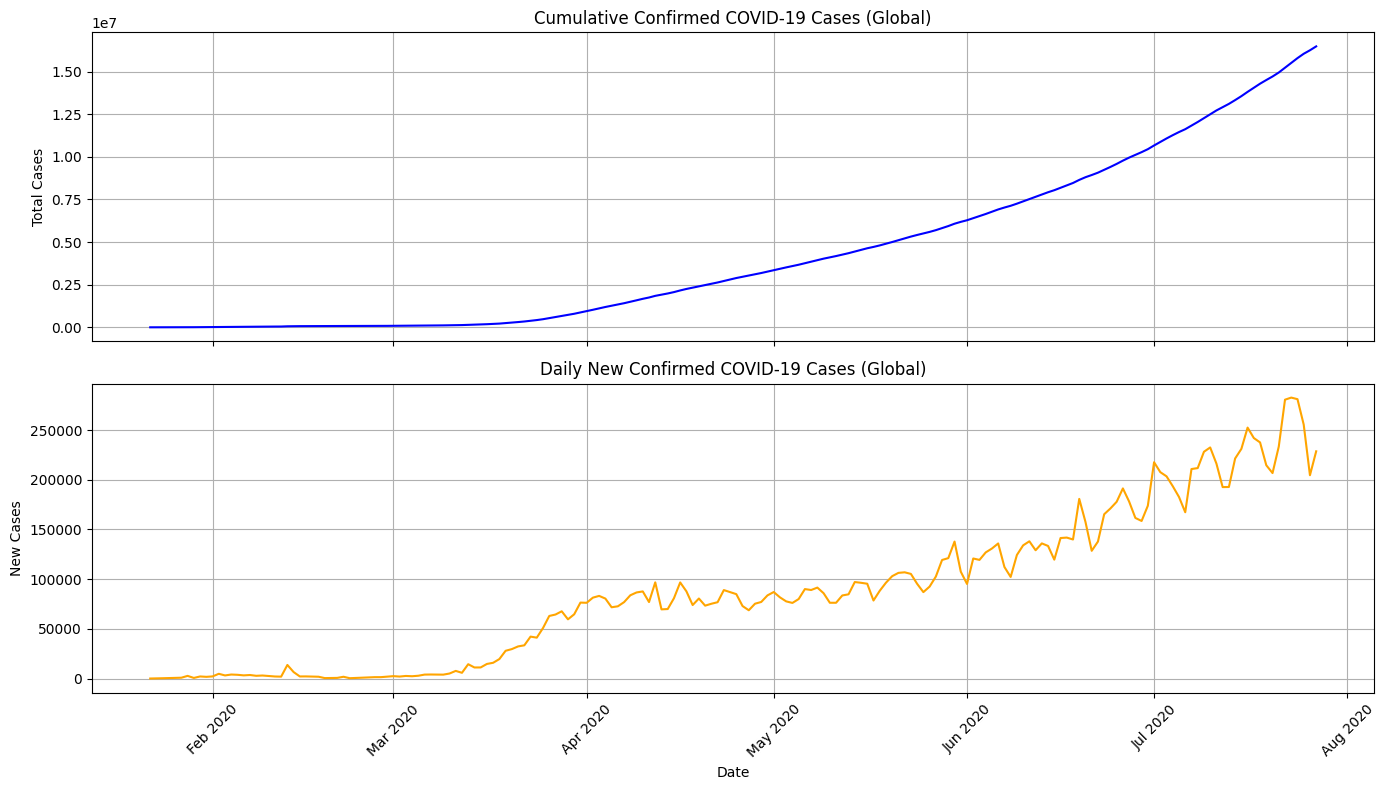

In [21]:
import matplotlib.dates as mdates

global_daily['date'] = pd.to_datetime(global_daily['date'])
daily_df['date'] = pd.to_datetime(daily_df['date'])

fig, ax = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Cumulative plot
ax[0].plot(daily_df['date'], daily_df['confirmed'], color='blue')
ax[0].set_title('Cumulative Confirmed COVID-19 Cases (Global)')
ax[0].set_ylabel('Total Cases')
ax[0].grid(True)

# Daily new cases plot
ax[1].plot(daily_df['date'], daily_df['daily_new'], color='orange')
ax[1].set_title('Daily New Confirmed COVID-19 Cases (Global)')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('New Cases')
ax[1].grid(True)

# Format the shared x-axis with readable date ticks
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # e.g., "Jan 2021"
ax[1].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.setp(ax[1].xaxis.get_majorticklabels(), rotation=45)  # Rotate labels

plt.tight_layout()
plt.show()



**INTERPRETATION**

The number of daily new confirmed COVID-19 cases showed a generally increasing trend over time, with occasional fluctuations. This consistent rise in daily infections prompted governments and health authorities to issue warnings and enforce public health measures, including lockdowns, quarantines, and travel restrictions.

These efforts were aimed at containing the spread, especially during visible waves of infection where daily cases spiked significantly.



In [22]:
# Take the latest date's data
latest_date = df['date'].max()
map_df = df[df['date'] == latest_date]

# Select necessary columns
map_df = map_df[['country/region', 'confirmed', 'deaths', 'recovered', 'lat', 'long']]


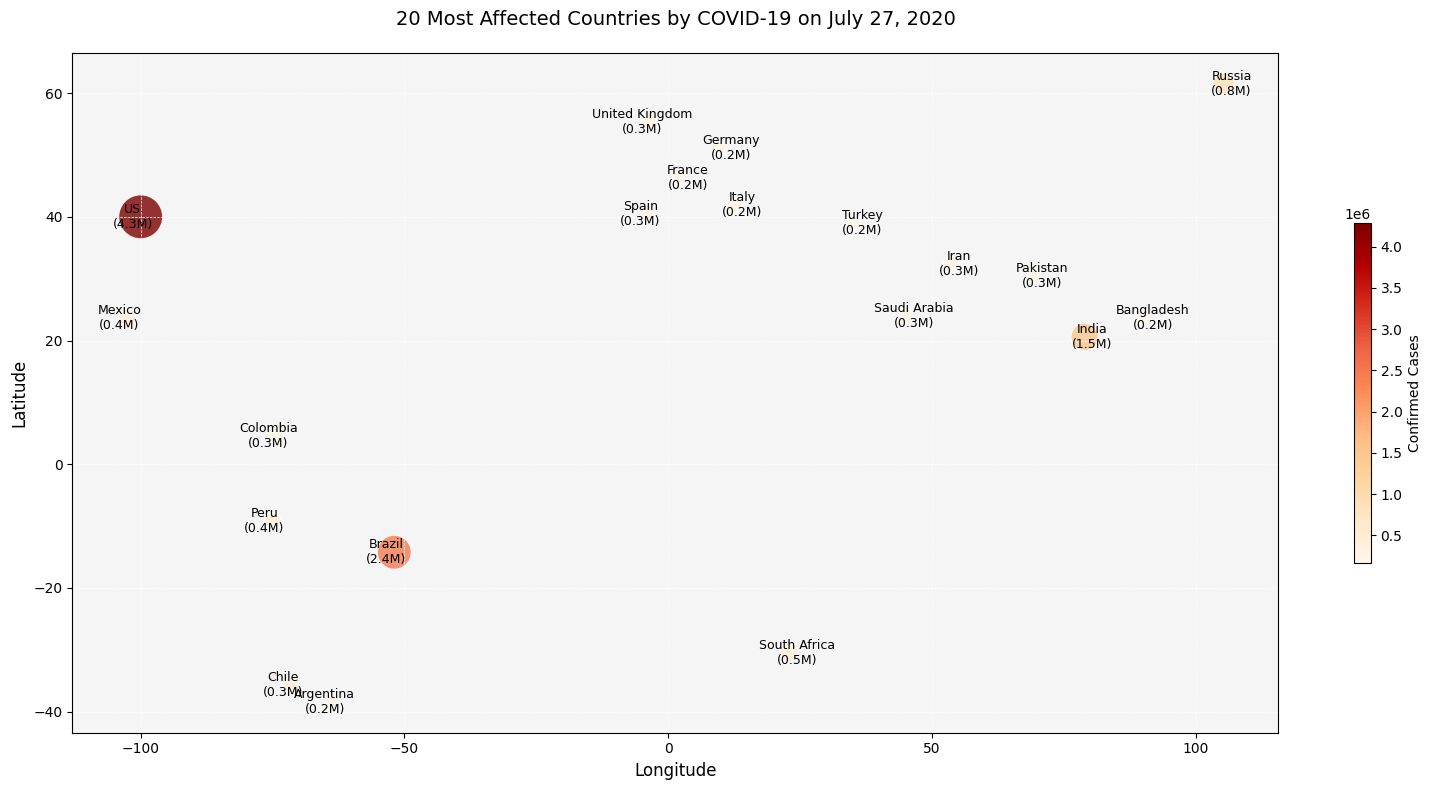

In [28]:
import seaborn as sns

top_map_df = map_df.sort_values(by='confirmed', ascending=False).head(20)

# Set up figure
plt.figure(figsize=(16, 8))
ax = plt.gca()

# Create bubble plot
scatter = sns.scatterplot(
    x='long', 
    y='lat',
    size='confirmed',
    hue='confirmed',
    sizes=(100, 1000),  # Increased minimum size for better visibility
    palette='OrRd',     # Orange-Red gradient shows severity better
    alpha=0.8,         # Slight transparency for overlapping points
    data=top_map_df,
    legend=False,
    ax=ax
)

# Adding country labels 
for _, row in top_map_df.iterrows():
    # Offset text position based on longitude to avoid overlaps
    x_offset = 1.5 if row['long'] > 0 else -1.5
    ax.text(
        row['long'] + x_offset, 
        row['lat'], 
        f"{row['country/region']}\n({row['confirmed']/1e6:.1f}M)",
        fontsize=9,
        ha='center',
        va='center'
    )

# Add map background for context
ax.set_facecolor('#f5f5f5')
ax.grid(color='white', linestyle='--', linewidth=0.5)

# Title and labels
plt.title(
    f'20 Most Affected Countries by COVID-19 on {pd.to_datetime(latest_date).strftime("%B %d, %Y")}',
    fontsize=14,
    pad=20
)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Add colorbar for severity reference
norm = plt.Normalize(top_map_df['confirmed'].min(), top_map_df['confirmed'].max())
sm = plt.cm.ScalarMappable(cmap="OrRd", norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax, label='Confirmed Cases', shrink=0.5)

plt.tight_layout()
plt.show()

**Insights**

1. Global Hotspots

The largest bubbles (Brazil, India, US, etc.) confirm these countries were epicenters of the pandemic as of this date, with Brazil showing particularly severe spread.

European nations (like Spain, Italy) appear smaller but clustered, indicating widespread regional transmission.

2. Northern Hemisphere Dominance

Most affected countries lie north of the equator, suggesting potential climate or travel-pattern influences on early spread.

3. Labeling Reveals Scale

The "X.XM" labels (e.g., "Brazil: 2.4M") highlight staggering case volumes in the worst-hit nations.

Smaller bubbles with labels (e.g., Saudi Arabia) show emerging outbreaks.

4. Data Limitations

Absence of China (if missing) may reflect early reporting gaps—a known issue in 2020 data.

Bubble overlap in Europe suggests using interactive tools (e.g., hover details) for crowded regions.

Key Takeaway: By mid-2020, COVID-19 had become a global crisis, with explosive growth in the Americas and South Asia, while Europe showed persistent transmission. The visualization underscores the need for regionalized public health responses.